In [1]:
#https://github.com/dionresearch/hotelling/blob/master/notebooks/hotelling_control_chart_example.ipynb
import pandas as pd
from hotelling.plots import control_chart, control_stats, univariate_control_chart

In [7]:
y = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        "impurities": [
            14.92,
            16.90,
            17.38,
            16.90,
            16.92,
            16.71,
            17.07,
            16.93,
            16.71,
            16.88,
            16.73,
            17.07,
            17.60,
            16.90,
        ],
        "temp": [
            85.77,
            83.77,
            84.46,
            86.27,
            85.23,
            83.81,
            86.08,
            85.85,
            85.73,
            86.27,
            83.46,
            85.81,
            85.92,
            84.23,
        ],
        "concentration": [
            42.26,
            43.44,
            42.74,
            43.60,
            43.18,
            43.72,
            43.33,
            43.41,
            43.28,
            42.59,
            44.00,
            42.78,
            43.11,
            43.48,
        ],
    }
)

y.set_index("id", inplace=True)
y

,impurities,temp,concentration
id,,,
1,14.92,85.77,42.26
2,16.90,83.77,43.44
3,17.38,84.46,42.74
4,16.90,86.27,43.60
5,16.92,85.23,43.18
6,16.71,83.81,43.72
7,17.07,86.08,43.33
8,16.93,85.85,43.41
9,16.71,85.73,43.28


In [3]:
help(control_chart)

Help on function control_chart in module hotelling.plots:

control_chart(x, phase=1, alpha=0.001, x_bar=None, s=None, legend_right=False, interactive=False, width=10, cusum=False, template='none', marker='o', ooc_marker='x', random_state=42, limit=1000, no_display=False)
    control_chart.
    
    Hotelling Control Chart based on Q / T^2.
    
    See also `control_interval` for more detail
    
    :param x: pandas dataframe, uni or multivariate
    :param phase: 1 or 2 - phase 1 is within initial sample, phase 2 is measuring implemented control
    :param alpha: significance level - used to calculate control lines at α/2 and 1-α/2
    :param x_bar: sample mean (optional, required with s)
    :param s: sample covariance (optional, required with x_bar)
    :param legend_right: default to 'left', can specify 'right'
    :param interactive: if  True and plotly is available, renders as interactive plot in notebook. False, render image.
    :param width: how many units wide. defaults to 1

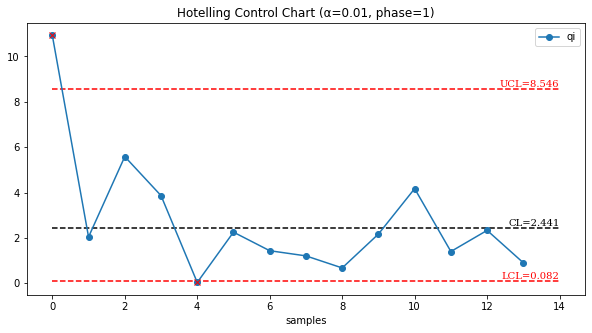

In [4]:
ax = control_chart(y, alpha=0.01, legend_right=True);

In [5]:
help(univariate_control_chart)

Help on function univariate_control_chart in module hotelling.plots:

univariate_control_chart(x, var=None, sigma=3, legend_right=False, interactive=False, connected=True, width=10, cusum=False, cusum_only=False, template='none', marker='o', ooc_marker='x', limit=1000, random_state=42, no_display=False)
    univariate_control_chart.
    
    :param x: dask or pandas dataframe, uni or multivariate
    :param var: optional, variable to plot (default to all)
    :param sigma: default to 3 sigma from mean for upper and lower control lines
    :param legend_right: default to 'left', can specify 'right'
    :param interactive: if plotly is available, renders as interactive plot in notebook. False to render image.
    :param connected: defaults to True. Appropriate when time related /consecutive batches, else, should be False
    :param width: how many units wide. defaults to 10, good for notebooks
    :param cusum: use cumulative sum instead of average
    :param cusum_only: don't display va

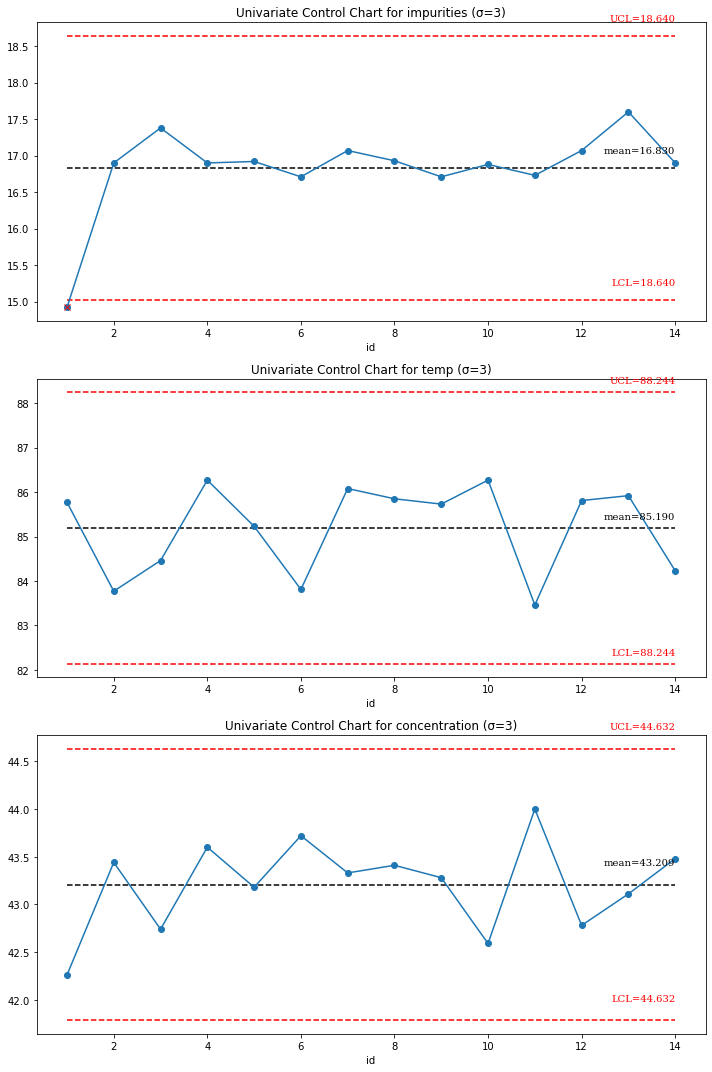

In [8]:
fig = univariate_control_chart(y, legend_right=True);

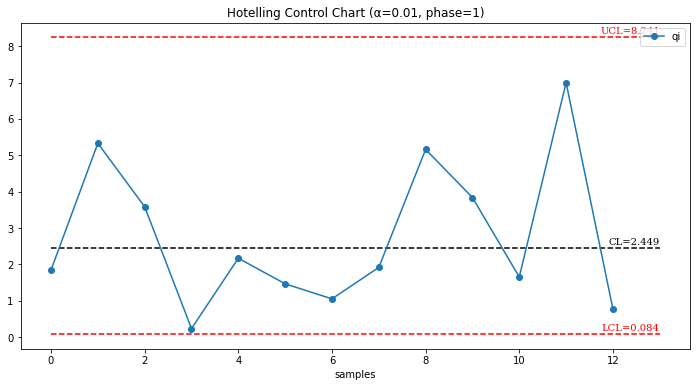

In [9]:
y_sub = y[1:]
control_chart(y_sub, alpha=0.01, legend_right=True, width=12);

In [10]:

x_bar, s = control_stats(y_sub)
x_bar

impurities       16.976923
temp             85.145385
concentration    43.281538
dtype: float64

In [11]:
s

,impurities,temp,concentration
impurities,0.067006,0.076218,-0.053878
temp,0.076218,1.092777,-0.215359
concentration,-0.053878,-0.215359,0.162997


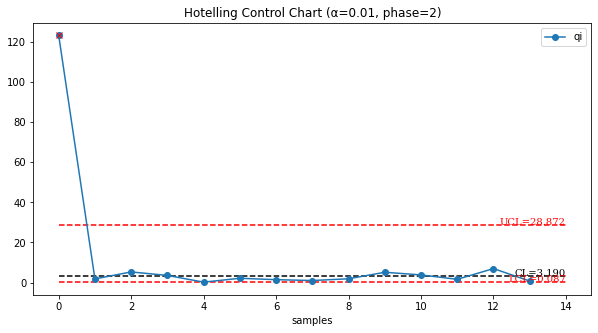

In [12]:
control_chart(y, alpha=0.01, phase=2, x_bar=x_bar, s=s, legend_right=True);